In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

In [69]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

### Paso 1: Definición del problema
**Problema**: Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

**Descripción**: El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

**Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.**

**En este conjunto de datos encontrarás las siguientes variables:**

- age. Edad del cliente (numérico)
- job. Tipo de trabajo (categórico)
- marital. Estado civil (categórico)
- education. Nivel de educación (categórico)
- default. ¿Tiene crédito actualmente? (categórico)
- housing. ¿Tiene un préstamo de vivienda? (categórico)
- loan. ¿Tiene un préstamo personal? (categórico)
- contact. Tipo de comunicación de contacto (categórico)
- month. Último mes en el que se le ha contactado (categórico)
- day_of_week. Último día en el que se le ha contactado (categórico)
- duration. Duración del contacto previo en segundos (numérico)
- campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
- pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
- previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
- poutcome. Resultado de la campaña de marketing anterior (categórico)
- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
- nr.employed. Número de empleados. Indicador trimestral (numérico)
- y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)

### Paso 2: Recopilación de datos

In [70]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/bank-marketing-campaign-data.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Paso 3: Análisis descriptivo

In [71]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(None, (41188, 21))

In [72]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
List_cat = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
List_num = df.select_dtypes(include=['float64','int64']).columns.tolist()

In [ ]:
List_cat,List_num

> ### Observaciones:
>
> - Existen un total de 41188 filas (personas) y 21 columnas, entre las cuales encontramos el target 'Y': ha contrató o no un depósito a largo plazo.
> - No hay valores nulos en ninguna variable.
> - Los datos cuentan con 10 características numéricas y 11 características categóricas.

### Paso 4: Limpieza de datos

In [74]:
df.duplicated().sum() #hay 12 duplicados

np.int64(12)

In [75]:
df.drop_duplicates(inplace=True)

In [76]:
df.drop_duplicates(), df.duplicated().sum()


(       age          job  marital            education  default housing loan  \
 0       56    housemaid  married             basic.4y       no      no   no   
 1       57     services  married          high.school  unknown      no   no   
 2       37     services  married          high.school       no     yes   no   
 3       40       admin.  married             basic.6y       no      no   no   
 4       56     services  married          high.school       no      no  yes   
 ...    ...          ...      ...                  ...      ...     ...  ...   
 41183   73      retired  married  professional.course       no     yes   no   
 41184   46  blue-collar  married  professional.course       no      no   no   
 41185   56      retired  married    university.degree       no     yes   no   
 41186   44   technician  married  professional.course       no      no   no   
 41187   74      retired  married  professional.course       no     yes   no   
 
          contact month day_of_week  .

### Paso 5: Análisis de variables

In [77]:
df['housing'].value_counts(),df['loan'].value_counts(), df['marital'].value_counts()

(housing
 yes        21571
 no         18615
 unknown      990
 Name: count, dtype: int64,
 loan
 no         33938
 yes         6248
 unknown      990
 Name: count, dtype: int64,
 marital
 married     24921
 single      11564
 divorced     4611
 unknown        80
 Name: count, dtype: int64)

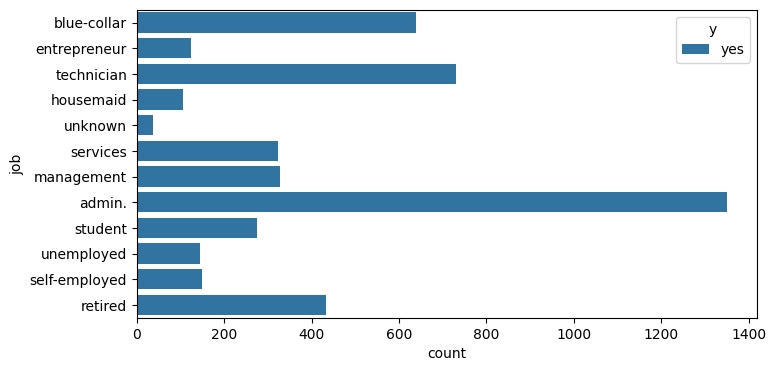

In [78]:
plt.figure(figsize=(8,4))
sns.countplot(data=df[df['y'] == 'yes'], x=None, y='job', hue='y')  
plt.show()

In [79]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.02,10.42,17.00,32.00,38.00,47.00,98.00
duration,41176.0,258.32,259.31,0.00,102.00,180.00,319.00,4918.00
campaign,41176.0,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,41176.0,962.46,186.94,0.00,999.00,999.00,999.00,999.00
previous,41176.0,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41176.0,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41176.0,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41176.0,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41176.0,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,41176.0,5167.03,72.25,4963.60,5099.10,5191.00,5228.10,5228.10


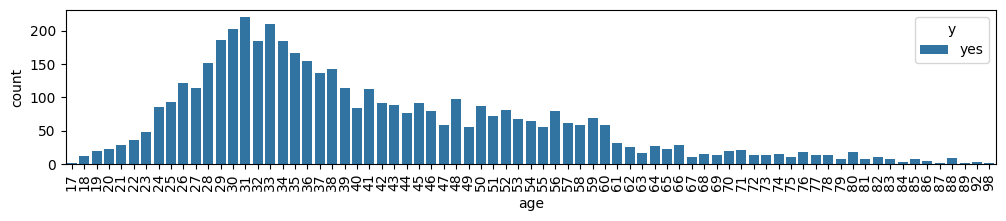

In [80]:
plt.figure(figsize=(12,2))
sns.countplot(data=df[df['y'] == 'yes'], x='age', y=None, hue='y')
plt.xticks(rotation=90)  
plt.show()

In [83]:
df['y_facto'] = pd.factorize(df['y'])[0]
df[['y', 'y_facto']], df['y_facto'].value_counts()

(         y  y_facto
 0       no        0
 1       no        0
 2       no        0
 3       no        0
 4       no        0
 ...    ...      ...
 41183  yes        1
 41184   no        0
 41185   no        0
 41186  yes        1
 41187   no        0
 
 [41176 rows x 2 columns],
 y_facto
 0    36537
 1     4639
 Name: count, dtype: int64)

In [85]:
y_facto_nomenclatura = df.set_index('y')['y_facto'].to_dict()
y_facto_nomenclatura

{'no': 0, 'yes': 1}

#### - Graficos de variables por cantidad:

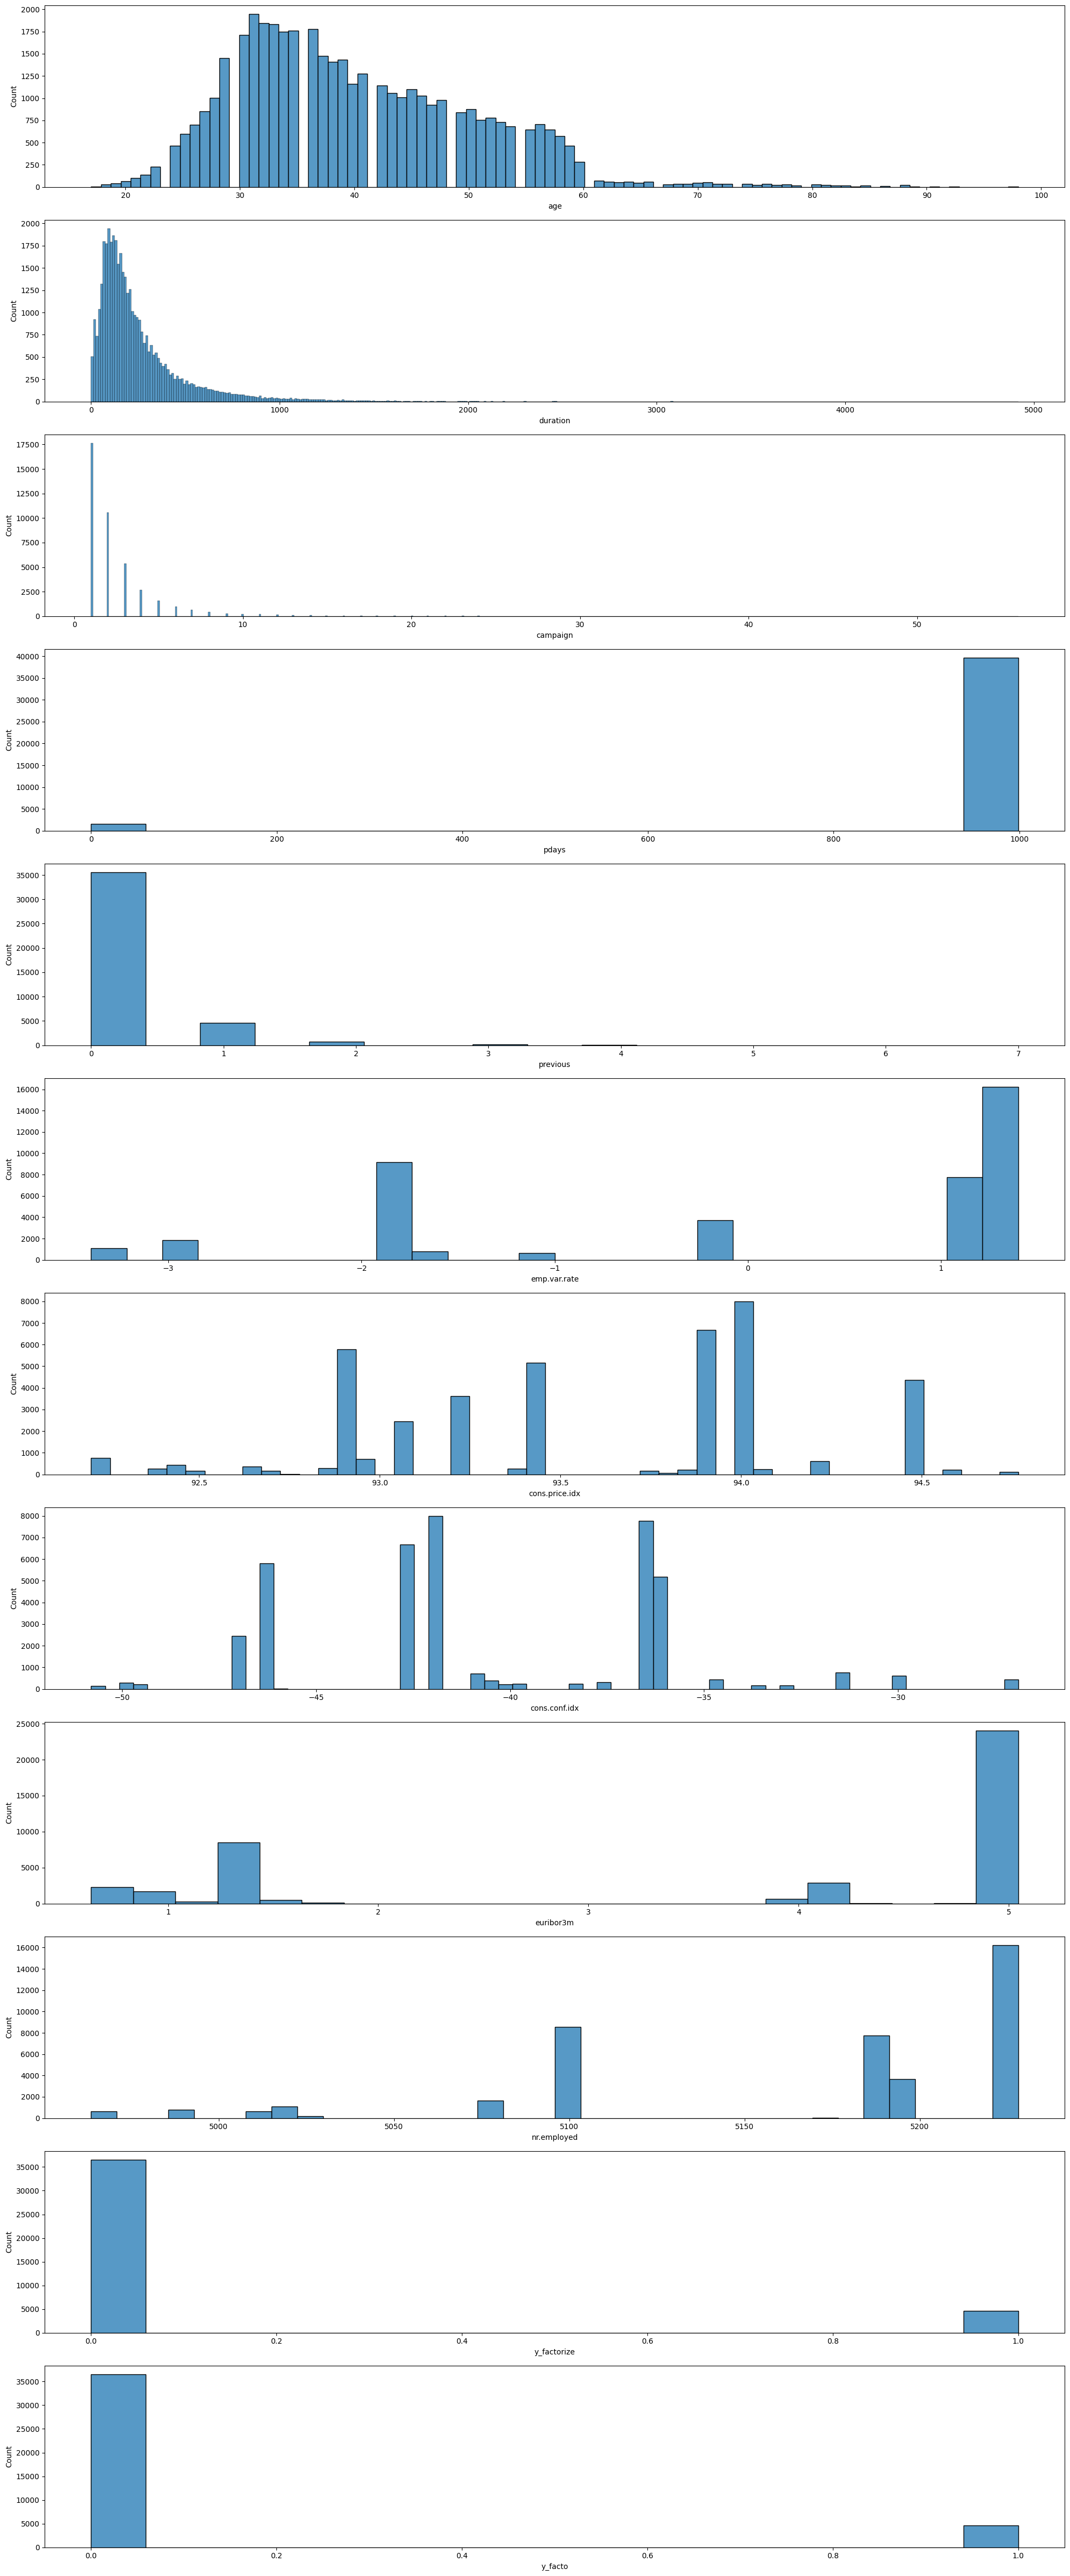

In [95]:
fig, axis = plt.subplots(len(List_num), 1, figsize=(20, 4*len(List_num)))

row = 0
for var in List_num:
    sns.histplot(ax=axis[row], data=df, x=var)
    row += 1

plt.tight_layout()
plt.show()

#### - Observaciones:
- De la var. 'campaign': a la gente se la contacto entre 1 y 5 veces.
- De la var. 'age': la mayor cantidad de clientes estan a partir de los 25 años hasta casi los 50 años.
- De la var. 'previous': a la gran mayoria no se le volvio a contactar.

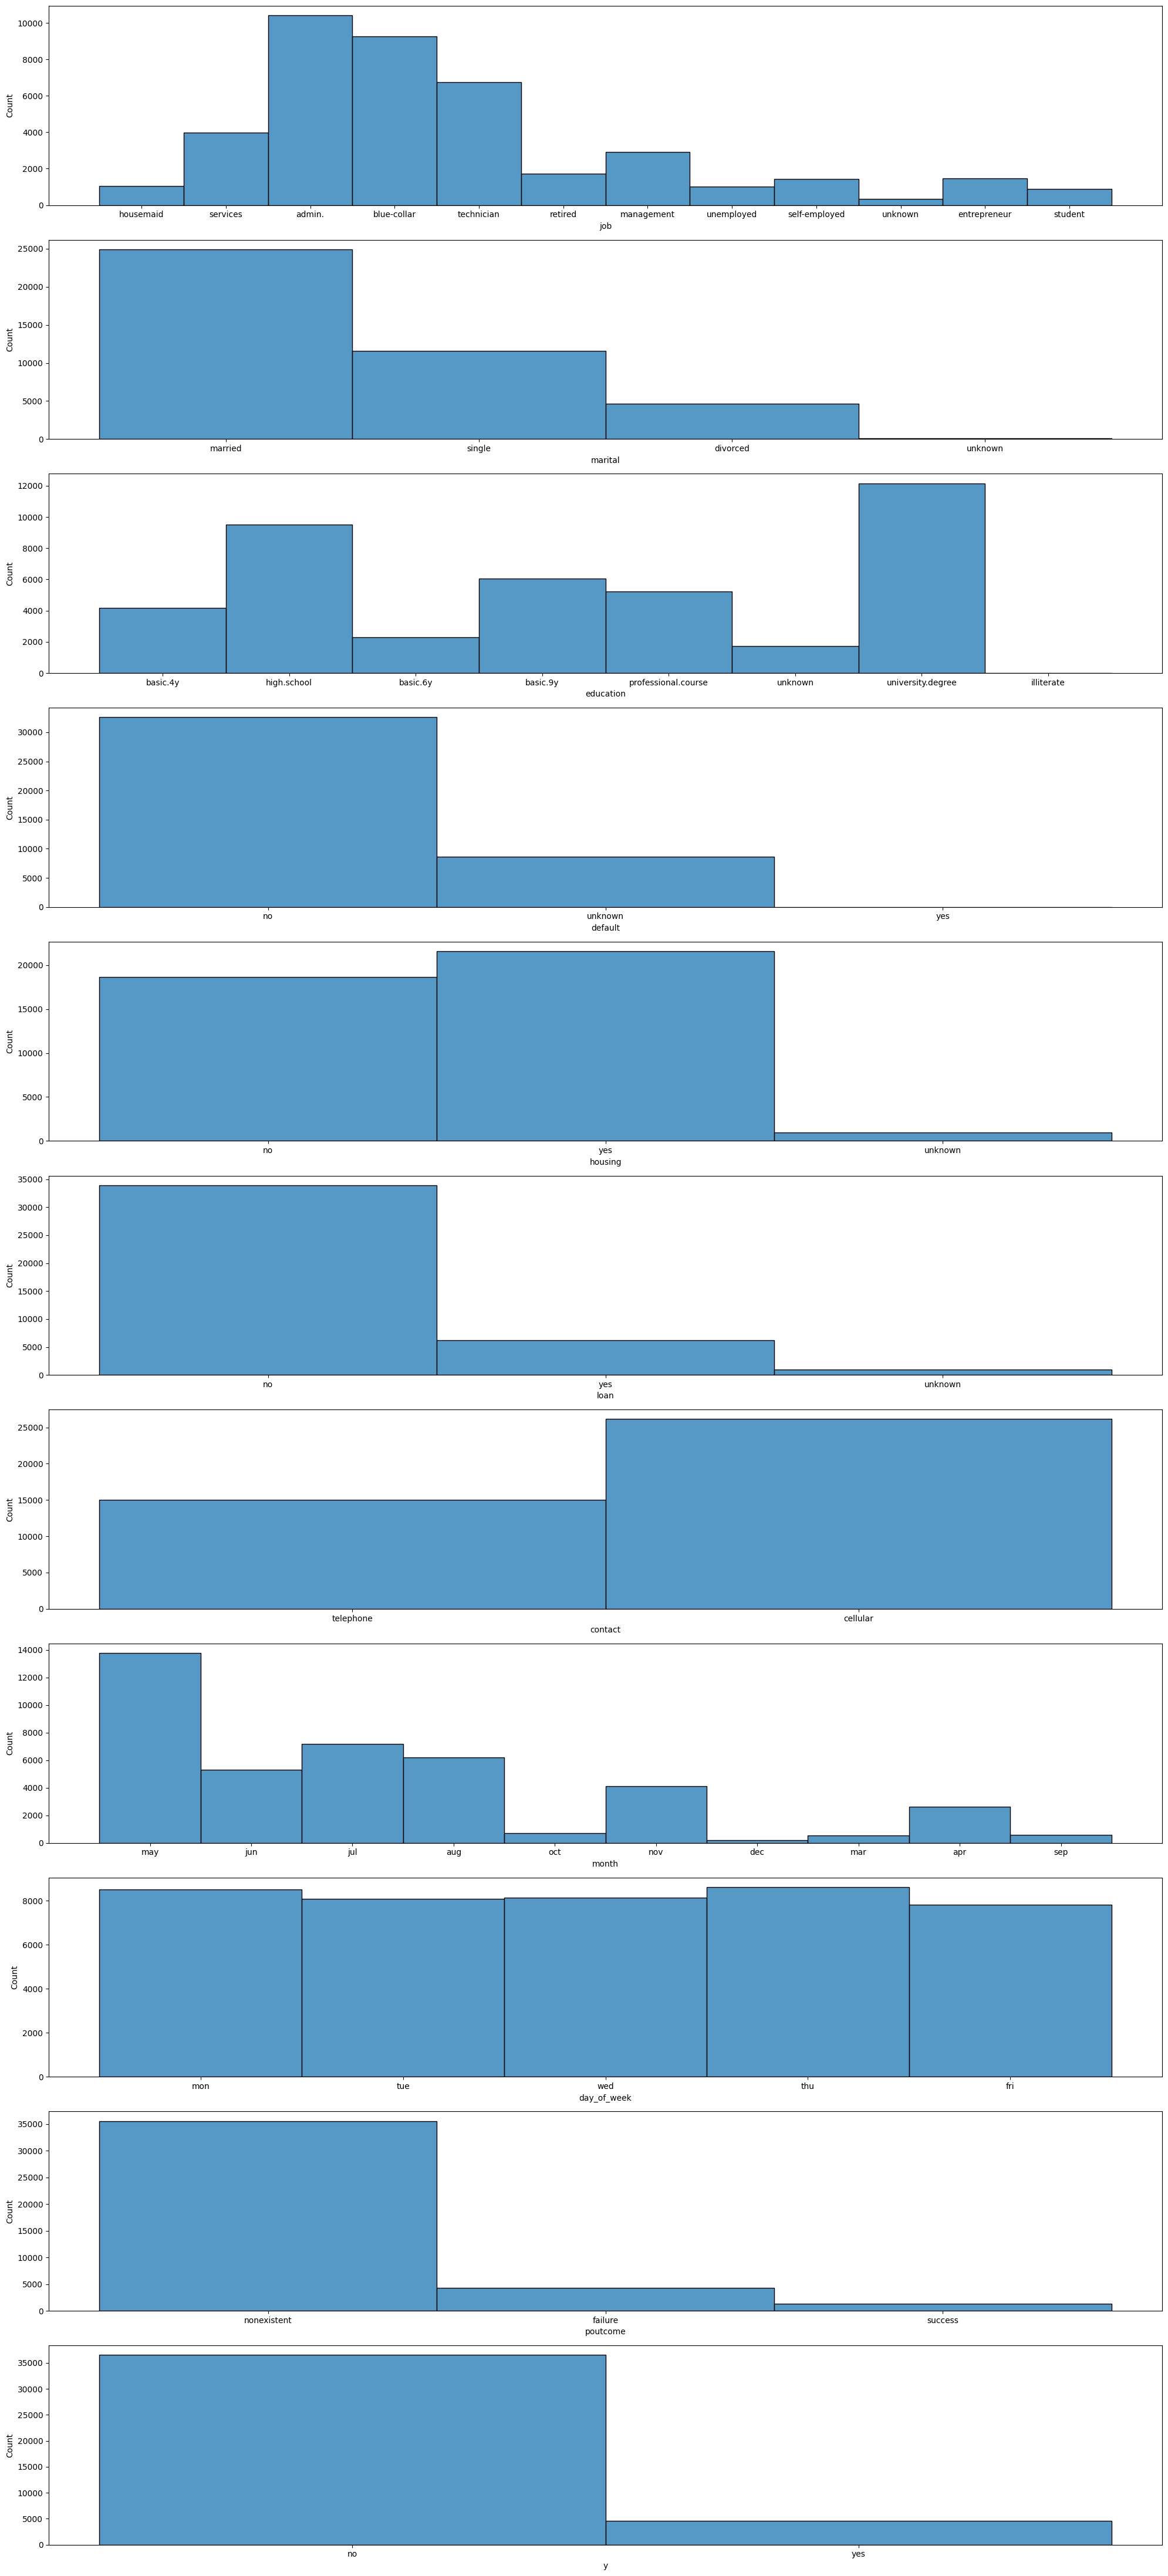

In [ ]:
fig, axis = plt.subplots(len(List_cat), 1, figsize=(20, 4*len(List_cat)))
row = 0
for var in List_cat:
    sns.histplot(ax=axis[row], data=df, x=var)
    row += 1
plt.tight_layout()
plt.show()

#### - Observaciones:
- De la var. 'marital': la mayoria de las personas estan casadas.
- De la var. 'job': el trabajo predominante esta compuesto por admin, lo cual mayormente se compone de perfiles administrativos/tecnicos. 
- De la var. 'education': mayormente gente con titulacion universitaria.
- De la var. 'loan': sobresale el 'no'
- De la var. 'month': claramente el mes de may fue el mas cargado y december el menos.
- De las otras variables poco se puede decir, hay pocos datos de la campaña anterior ('poutcome'), la mayoria de la gente fue contactada por movil('contact')

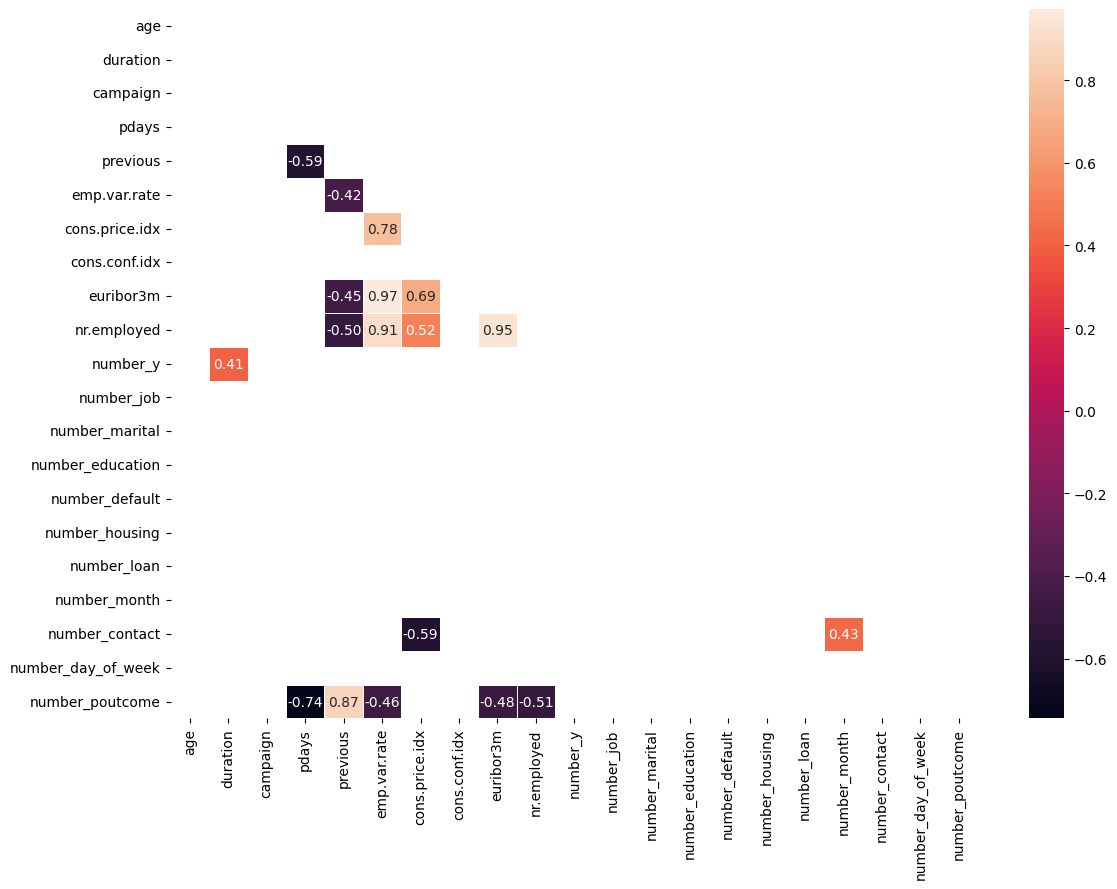

In [82]:

corr = df_numerico.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.4]
significant_corr
fig, axis = plt.subplots(figsize=(12, 9))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

- number_y/job compatible
- duration/job no compatible